In [2]:
from spgrm_filter import SpgrmFilter
import pandas as pd
import matplotlib.pyplot as plt
import heartpy as hp
import neurokit2 as nk


In [3]:
data = pd.read_csv('/home/ilya/Documents/stress-level-by-PPG/dataframe/test_movie_2.csv')

ppg_fr = 256
sec_with = 1000
num_sec = 40

ppg = data["afe_LED1ABSVAL"][sec_with * ppg_fr: (sec_with + num_sec) * ppg_fr]

In [4]:
ppg_filter = SpgrmFilter()
tmp = ppg_filter.filter(ppg=ppg, ppg_fr=256)

In [8]:
# Определяем список feature глобально
feature = [
    'HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN',
    "HRV_HF", 
    "HRV_LF", 
    "HRV_LFn", 
    "HRV_HFn", 
    "HRV_LFHF",
    "stress_index"
]

# feature = ['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'HRV_SDSD', 'HRV_CVNN', 'HRV_CVSD', 'HRV_MedianNN', 'HRV_MadNN', 'HRV_pNN50', 'HRV_pNN20', 'HRV_MinNN', 'HRV_MaxNN', 'HRV_HTI', 'HRV_TINN', 'HRV_HF', 'stress_index']

def get_feature_nk(signal, fr_ppg, label):
    peaks, _ = nk.ppg_peaks(signal, sampling_rate=fr_ppg, show=False)
    custom_scales = [4, 8, 16]

    hrv_indices = nk.hrv(
        peaks, 
        sampling_rate=fr_ppg,
        frequency=True,
        frequency_method="welch",
        frequency_params={"lf_band": [0.04, 0.15], "hf_band": [0.15, 0.4]},
        nonlinear_kwargs={"scale": custom_scales}
    )
    
    hrv_indices['stress_index'] = label
    filt_hrv_indices = hrv_indices[feature]
    
    return filt_hrv_indices.iloc[0].to_dict()

In [9]:
get_feature_nk(tmp, 256, 0)

/home/ilya/miniconda3/envs/PPG/lib/python3.10/site-packages/neurokit2/hrv/hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


{'HRV_MeanNN': 799.6002906976744,
 'HRV_SDNN': 143.56410770365557,
 'HRV_RMSSD': 197.99864177962783,
 'HRV_SDSD': 200.39552927611564,
 'HRV_CVNN': 0.17954484180888894,
 'HRV_HF': 0.09797124371339958,
 'HRV_LF': 0.02892802192585982,
 'HRV_LFn': 0.20939852161524022,
 'HRV_HFn': 0.7091751260065635,
 'HRV_LFHF': 0.2952705388785763,
 'stress_index': 0.0}

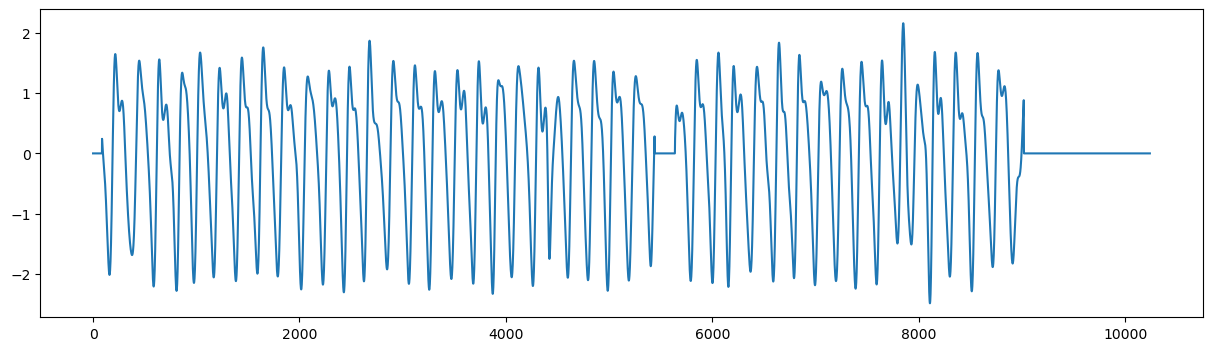

In [7]:
plt.figure(figsize=(15, 4))
plt.plot(tmp)